In [ ]:
# installing libraries
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv("/content/heart.csv")
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
rows, columns = dataframe.shape
print(f"There are {rows} rows and {columns} columns in the dataset")

There are 1025 rows and 14 columns in the dataset


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
dataframe.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
dataframe.describe().round(2).style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.430000,0.700000,0.940000,131.610000,246.000000,0.150000,0.530000,149.110000,0.340000,1.070000,1.390000,0.750000,2.320000,0.510000
std,9.070000,0.460000,1.030000,17.520000,51.590000,0.360000,0.530000,23.010000,0.470000,1.180000,0.620000,1.030000,0.620000,0.500000
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


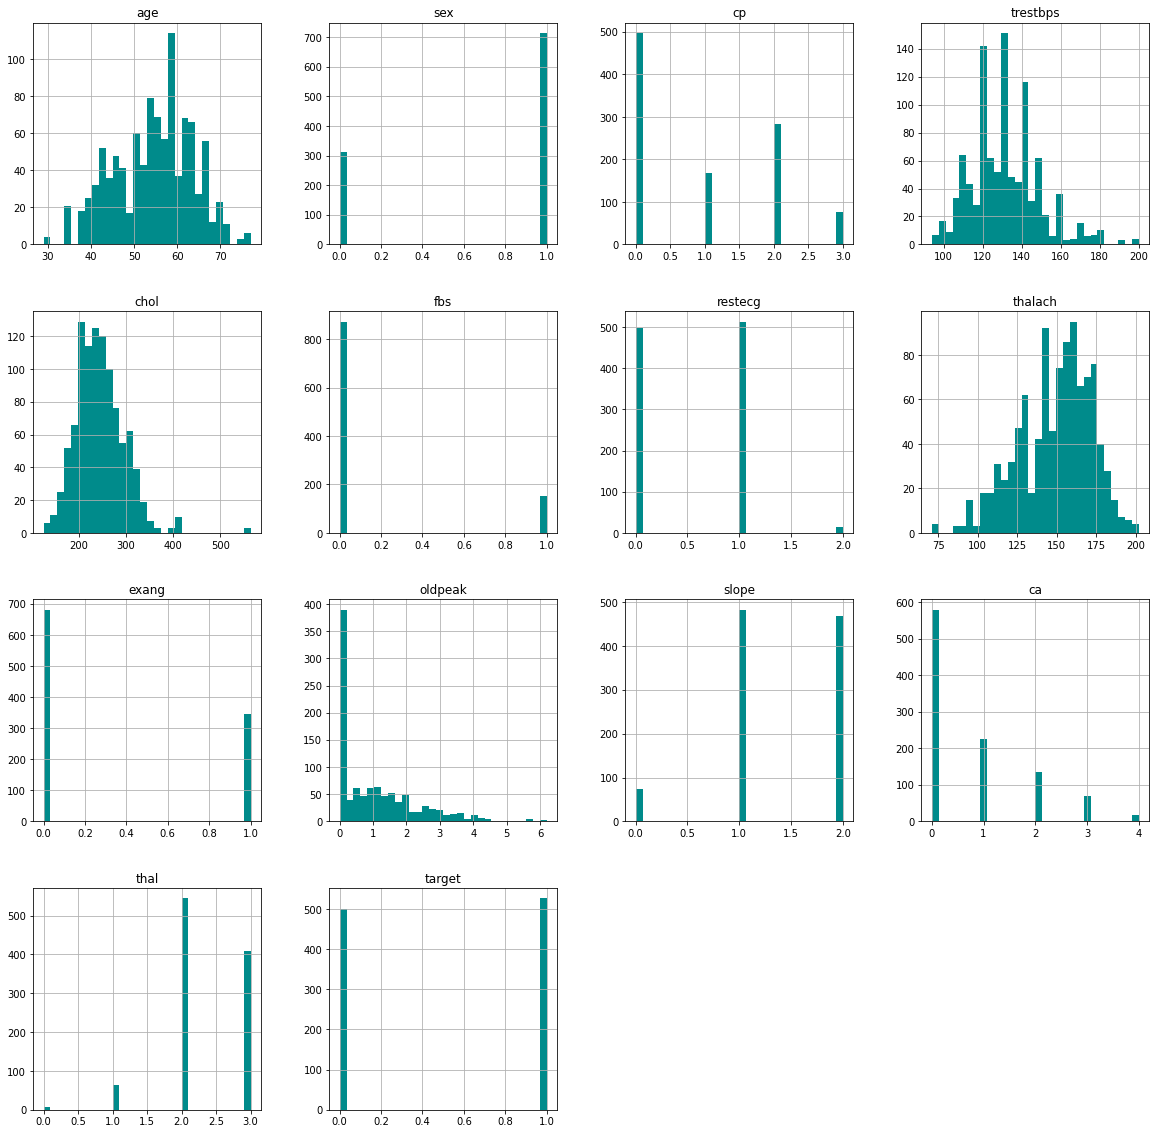

In [7]:
dataframe.hist(bins=30, layout=(4, 4), figsize=(20, 20), 
               column=dataframe.columns[0:], color="DarkCyan", 
               grid=True)
plt.show()

In [8]:
dataframe_corr = dataframe.corr()

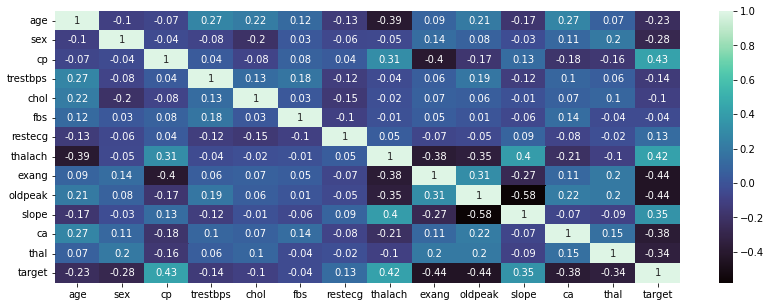

In [9]:
plt.figure(figsize=(14, 5))
sns.heatmap(round(dataframe_corr, 2), annot=True, cmap="mako")

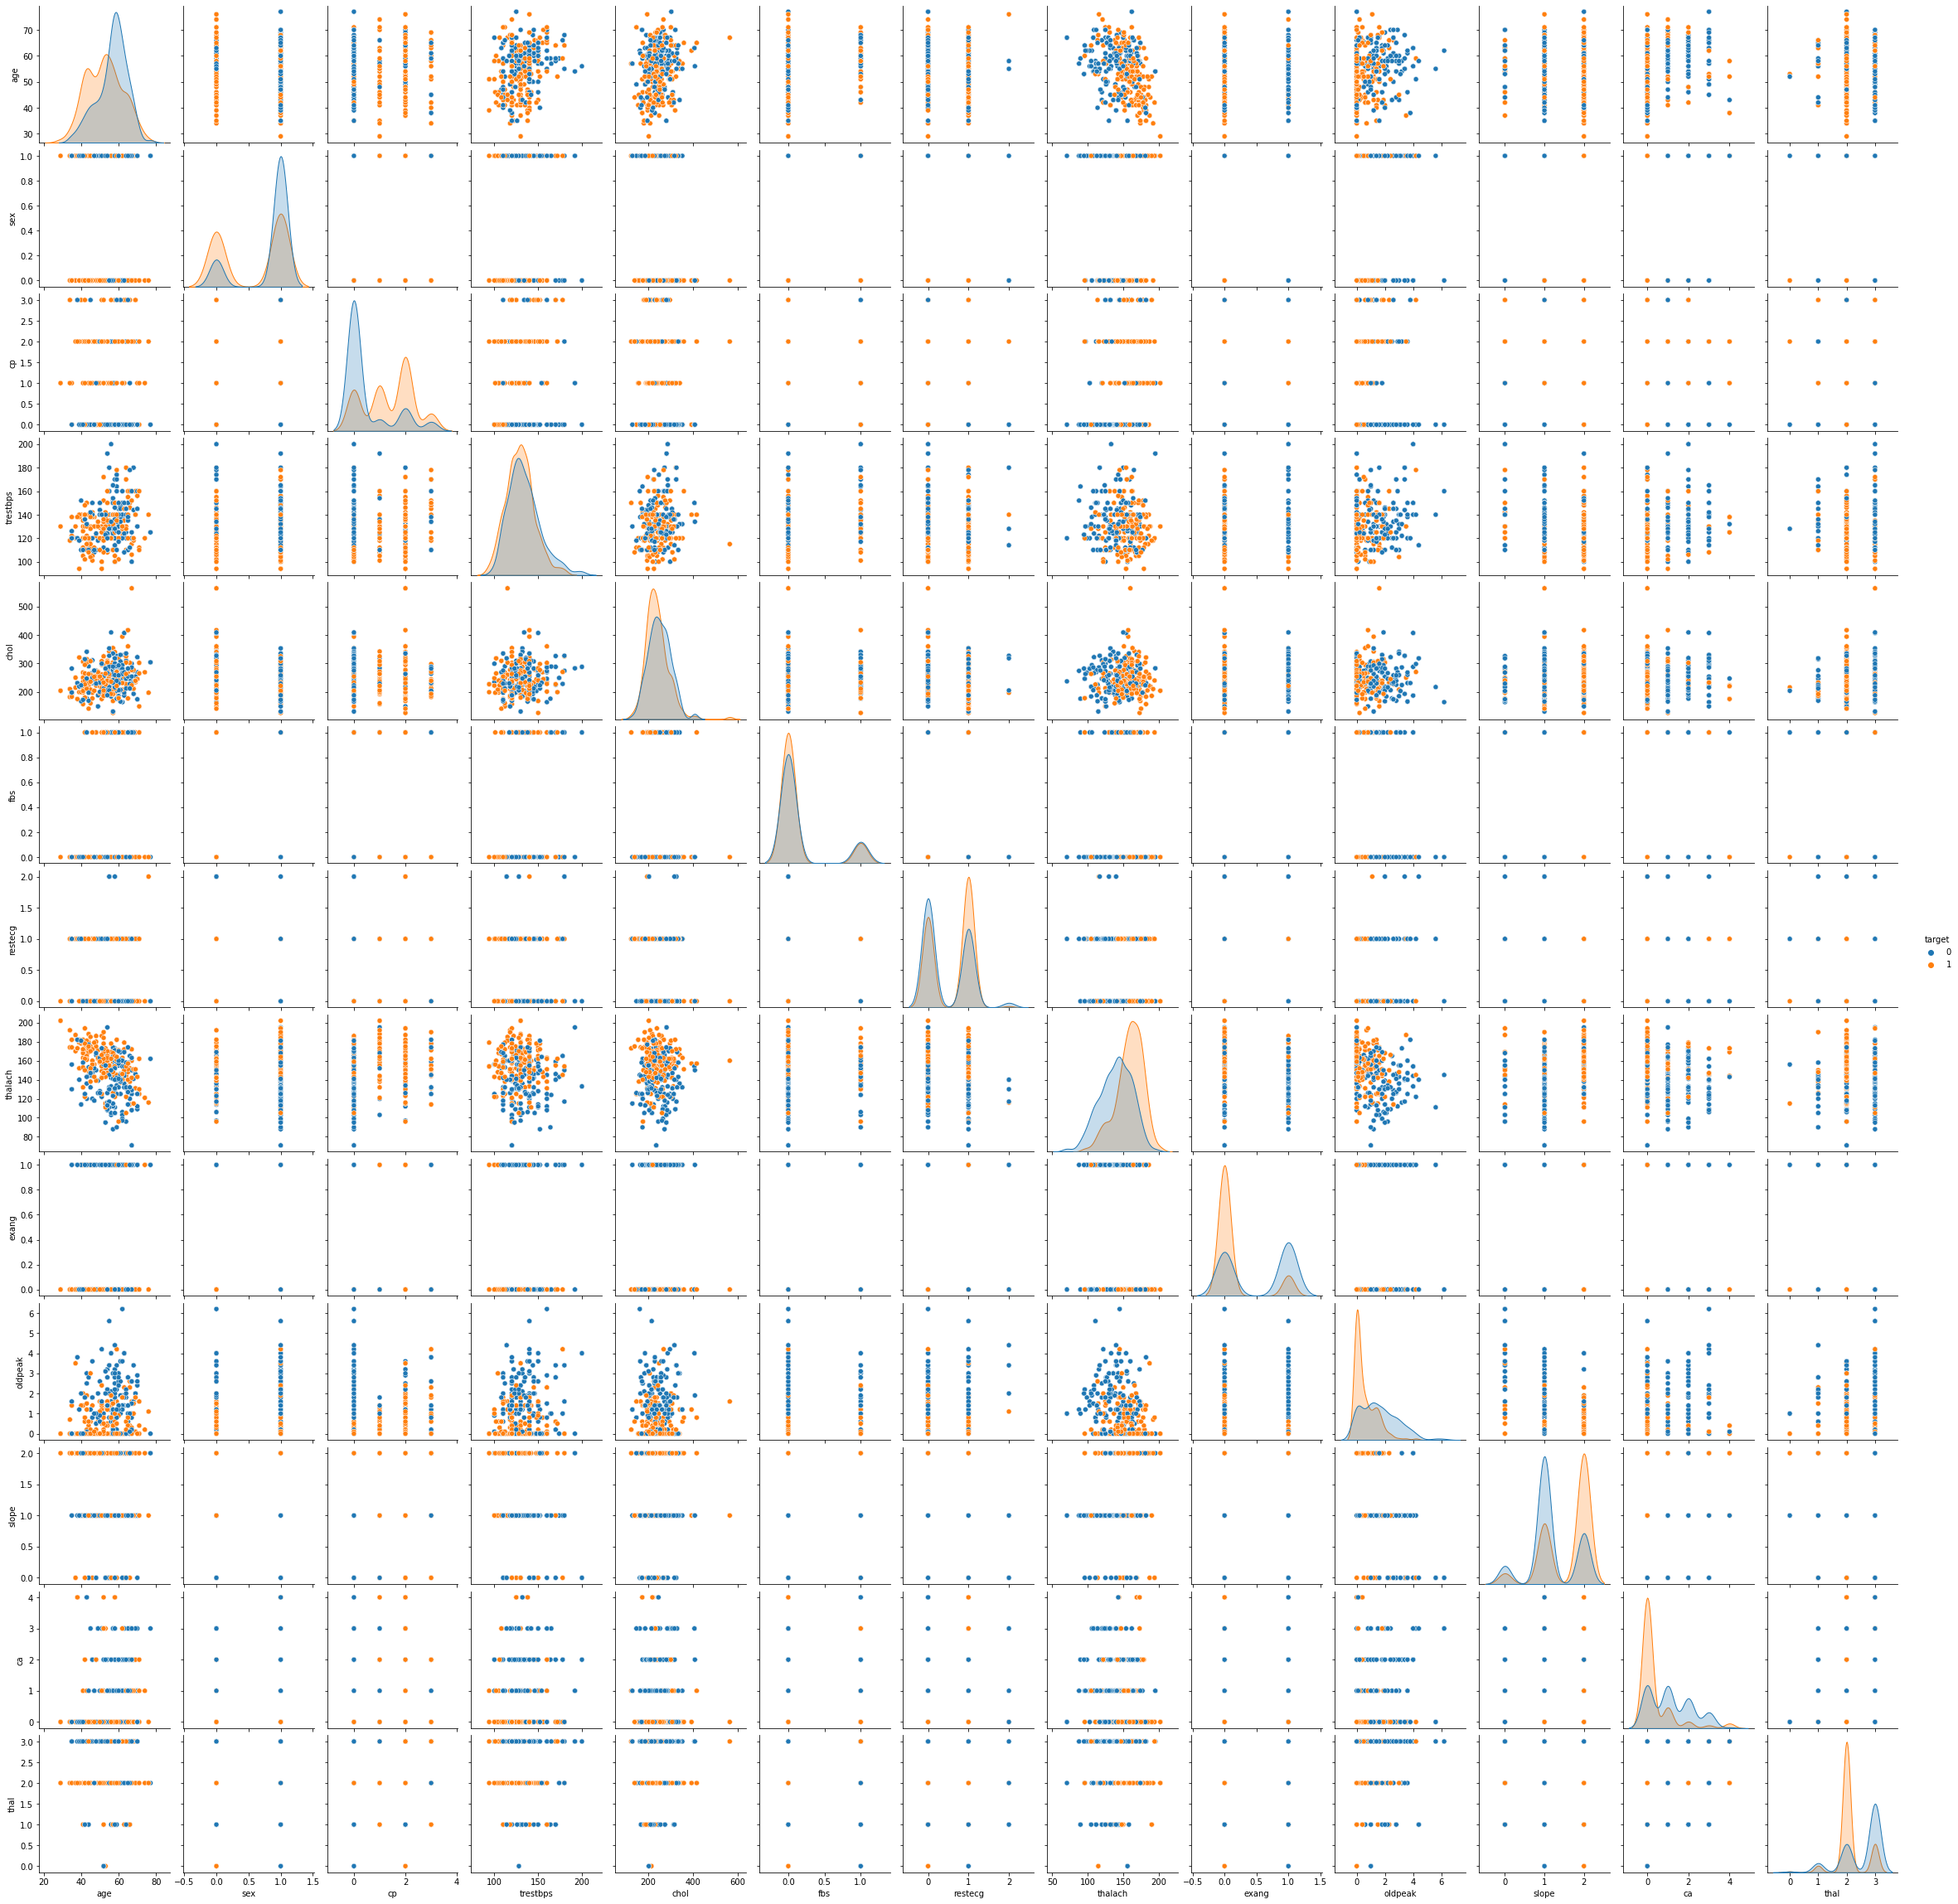

In [37]:
sns.pairplot(dataframe, hue='target')

In [10]:
features = ["thal", "ca", "slope", "restecg", "fbs", "cp", "sex", "exang"]
dataframe[features] = dataframe[features].astype(object)

In [11]:
dataframe.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [12]:
numerical_col = dataframe.select_dtypes(exclude=np.object_)
categorical_col = dataframe.select_dtypes(exclude=np.number)

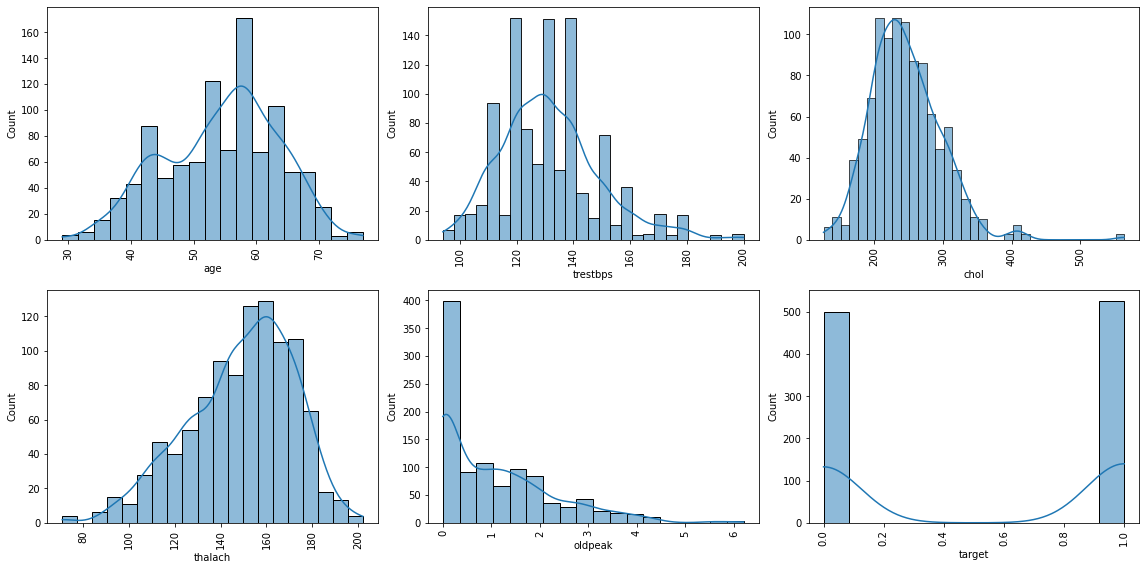

In [13]:
plt.figure(figsize=(16, 8))
for index, column in enumerate(numerical_col):
    plt.subplot(2, 3, index+1)
    sns.histplot(data=numerical_col, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

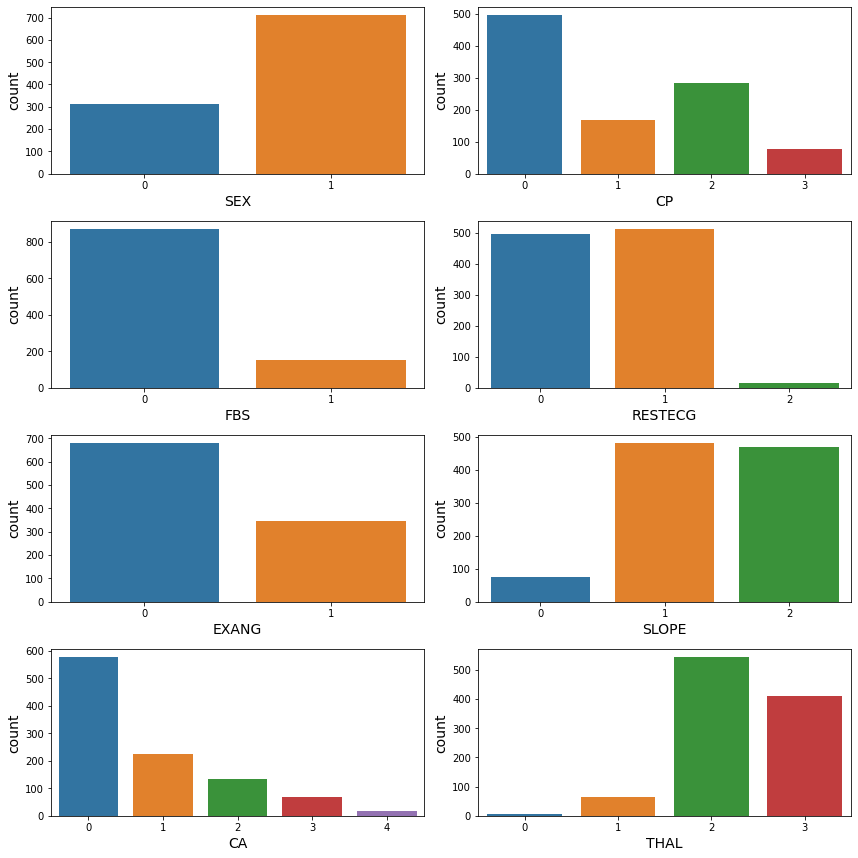

In [14]:
plt.figure(figsize=(12, 12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 2, index+1)
    sns.countplot(data=categorical_col, x=column)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad=1.0)
plt.show()

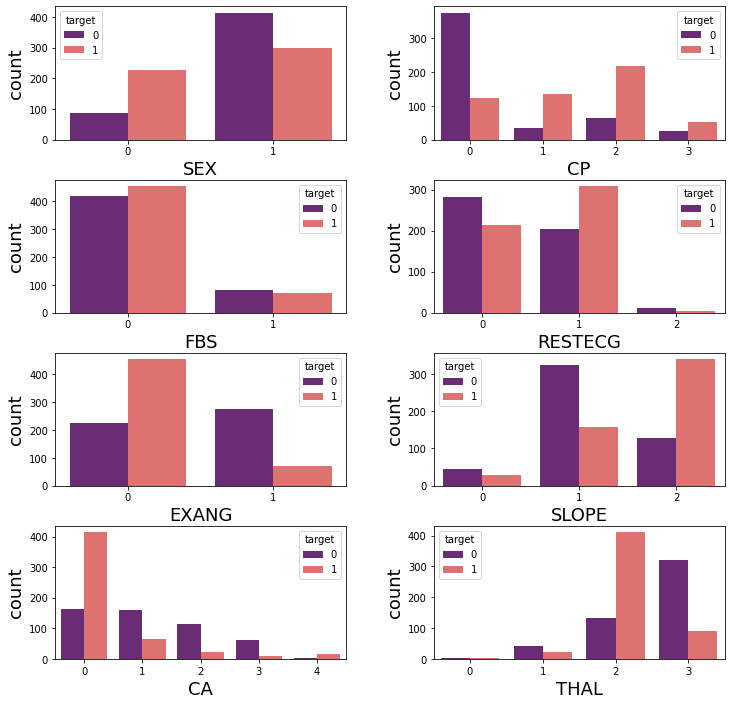

In [15]:
cat_cols = categorical_col.columns
fig = plt.figure(figsize=(12, 12))
for index in range(len(cat_cols)):
    if cat_cols[index] != "target":
        plt.subplot(4, 2, index+1)
        sns.countplot(data=categorical_col, x=cat_cols[index],
                      hue=dataframe["target"], palette="magma")
        plt.xlabel(cat_cols[index].upper(), fontsize=18)
        plt.ylabel("count", fontsize=18)
        plt.subplots_adjust(wspace=0.3, hspace=0.3)

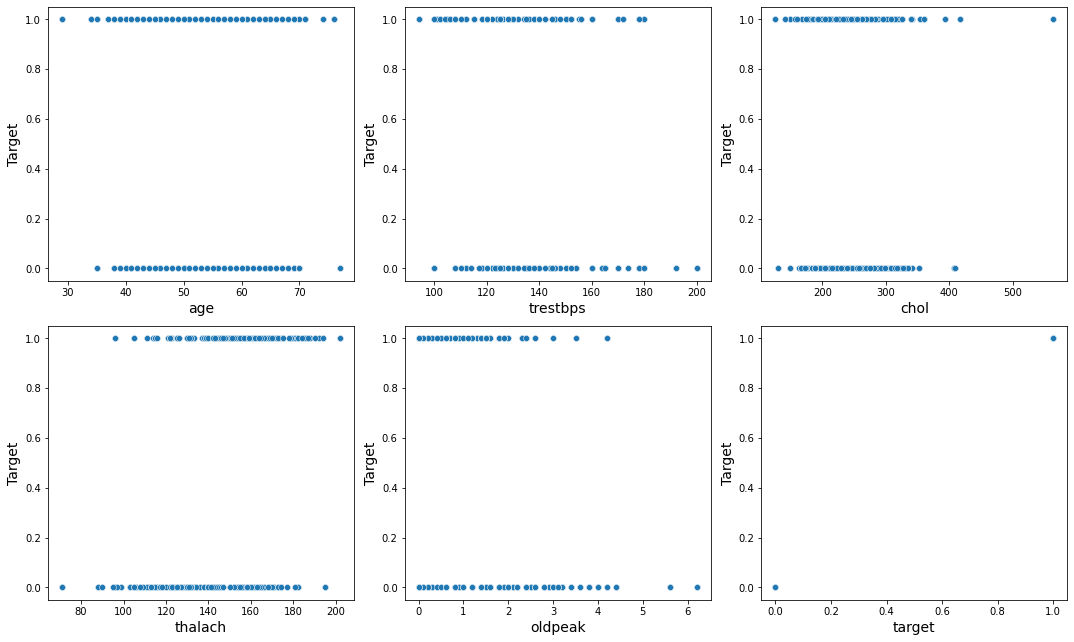

In [16]:
fig = plt.figure(figsize=(15, 9))
for index in range(len(numerical_col.columns)):
    plt.subplot(2, 3, index+1)
    sns.scatterplot(x=numerical_col.iloc[:, index],
                    y=dataframe.target, data=numerical_col)
    plt.xlabel(numerical_col.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad=1.0)

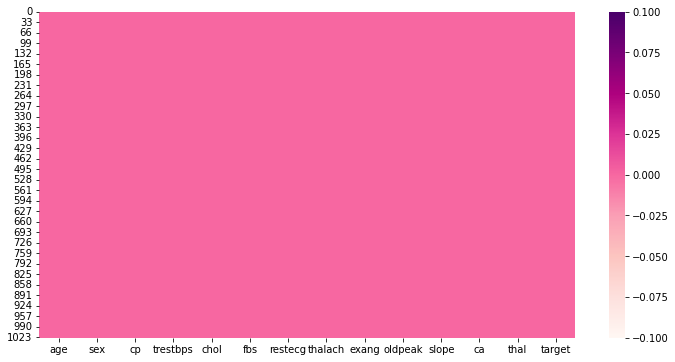

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataframe.isnull(), cmap="RdPu")
plt.show()

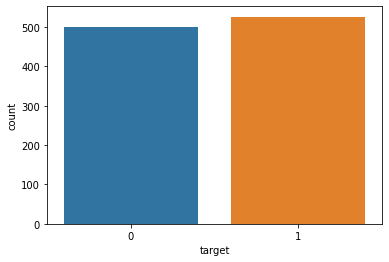

In [18]:
sns.countplot(data=dataframe, x="target")

In [19]:
dum_df = pd.get_dummies(dataframe, columns=["thal", "ca", "slope",
                                            "exang", "restecg",
                                            "fbs", "cp", "sex"],
                        drop_first=True)

In [20]:
dum_df.head()

,age,trestbps,chol,thalach,oldpeak,target,thal_1,thal_2,thal_3,ca_1,...,slope_1,slope_2,exang_1,restecg_1,restecg_2,fbs_1,cp_1,cp_2,cp_3,sex_1
0,52,125,212,168,1.0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0


In [21]:
X = dum_df.drop(["trestbps", "chol", "fbs_1", "restecg_1", "restecg_2", "target", ], axis=1)
y = dum_df["target"]

In [22]:
X

,age,thalach,oldpeak,thal_1,thal_2,thal_3,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2,exang_1,cp_1,cp_2,cp_3,sex_1
0,52,168,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,53,155,3.1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,70,125,2.6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,61,161,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
4,62,106,1.9,0,1,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,164,0.0,0,1,0,0,0,0,0,0,1,1,1,0,0,1
1021,60,141,2.8,0,0,1,1,0,0,0,1,0,1,0,0,0,1
1022,47,118,1.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1023,50,159,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

ANN Using Tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=17, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                900       
                                                                 
 dense_1 (Dense)             (None, 75)                3825      
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [31]:
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [32]:
model.fit(x=x_train, y=y_train, epochs=100, 
          validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 18ms/step - loss: 0.5177 - accuracy: 0.7915 - val_loss: 0.4480 - val_accuracy: 0.7902
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.8463 - val_loss: 0.4065 - val_accuracy: 0.8146
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8671 - val_loss: 0.3759 - val_accuracy: 0.8341
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.2834 - accuracy: 0.8805 - val_loss: 0.3514 - val_accuracy: 0.8341
Epoch 5/100
26/26 [==============================] - 0s 11ms/step - loss: 0.2663 - accuracy: 0.8915 - val_loss: 0.3394 - val_accuracy: 0.8390
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.8988 - val_loss: 0.3223 - val_accuracy: 0.8488
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.2349 - accuracy: 0.9110 - val_loss: 0.3132 - val_accuracy: 0.8683
Epoch 8/100

In [33]:
model_loss = pd.DataFrame(model.history.history)

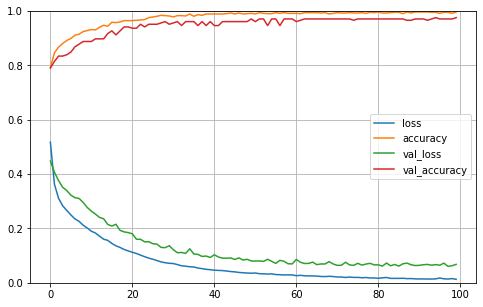

In [35]:
model_loss.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9756


[0.0678715705871582, 0.9756097793579102]

In [38]:
model.save("heart_disease.model", save_format="h5")

### Stroke Prediction

In [67]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df = df.drop(['id'], axis=1)
df['age'] = df['age'].astype('int')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [68]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [69]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [70]:
df = df[df['gender'] != 'Other']

In [71]:
gender_count = df.groupby(['gender']).size().reset_index().rename(columns={0: 'count'})
hypertension_count = df.groupby(['hypertension']).size().reset_index().rename(columns={0: 'count'})
heart_disease_count = df.groupby(['heart_disease']).size().reset_index().rename(columns={0: 'count'})
ever_married_count = df.groupby(['ever_married']).size().reset_index().rename(columns={0: 'count'})
work_type_count = df.groupby(['work_type']).size().reset_index().rename(columns={0: 'count'})
residence_type_count = df.groupby(['Residence_type']).size().reset_index().rename(columns={0: 'count'})
smoking_status_count = df.groupby(['smoking_status']).size().reset_index().rename(columns={0: 'count'})
stroke_count = df.groupby(['stroke']).size().reset_index().rename(columns={0: 'count'})

In [72]:
fig = make_subplots(rows=4, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])

In [74]:
## Gender Donut Chart
fig.add_trace(
    go.Pie(
        labels=gender_count['gender'],
        values=gender_count['count'],
        hole=.6,
        title='Gender',
        titlefont={'color':None, 'size': 24},       
        ),
    row=1,col=1
    )

## hypertension Donut Chart
fig.add_trace(
    go.Pie(
        labels=hypertension_count['hypertension'],
        values=hypertension_count['count'],
        hole=.6,
        title='Hypertension',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## heart_disease Donut Chart
fig.add_trace(
    go.Pie(
        labels=heart_disease_count['heart_disease'],
        values=heart_disease_count['count'],
        hole=.6,
        title='Heart Disease',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## ever_married Donut Chart
fig.add_trace(
    go.Pie(
        labels=ever_married_count['ever_married'],
        values=ever_married_count['count'],
        hole=.6,
        title='Ever Married',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## work_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=work_type_count['work_type'],
        values=work_type_count['count'],
        hole=.6,
        title='Work Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## residence_type Donut Chart
fig.add_trace(
    go.Pie(
        labels=residence_type_count['Residence_type'],
        values=residence_type_count['count'],
        hole=.6,
        title='Residence Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

## smoking_status Donut Chart
fig.add_trace(
    go.Pie(
        labels=smoking_status_count['smoking_status'],
        values=smoking_status_count['count'],
        hole=.6,
        title='Smoking Status',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=1
    )

## stroke Donut Chart
fig.add_trace(
    go.Pie(
        labels=stroke_count['stroke'],
        values=stroke_count['count'],
        hole=.6,
        title='Stroke',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
#         colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False, 
                  height=1200, 
                  width=1000,
                  template='seaborn',
                  title_x=0.5
                  )
fig.show()


In [75]:
fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))
fig.add_trace(go.Histogram(x=df['age'],name='age'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['avg_glucose_level'],name='avg_glucose_level'),row=2,col=1)

fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='seaborn', title_x=0.5, font_family='Courier New')

In [77]:
stroke_df = df[df['stroke'] == 1]
no_stroke_df = df[df['stroke'] == 0]

fig=make_subplots(rows=2,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level'))

fig.add_trace(go.Box(y=stroke_df['age'], name='stroke'),row=1,col=1)
fig.add_trace(go.Box(y=no_stroke_df['age'], name='no_stroke'),row=1,col=1)

fig.add_trace(go.Box(y=stroke_df['avg_glucose_level'],name='stroke'),row=2,col=1)
fig.add_trace(go.Box(y=no_stroke_df['avg_glucose_level'],name='no_stroke'),row=2,col=1)


fig.update_layout(height=800, width=1000, title_text='<b>Box Plots', font_size=20, showlegend=False)
fig.update_layout(template='seaborn', title_x=0.5, font_family='Courier New')

In [78]:
color_palette = ['#FFFCFE', '#B6E2D3', '#D8F9B1']

corr = df.corr()
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale=color_palette,
                                 text = corr.round(2), texttemplate="%{text}", xgap=3, ygap=3
                                 )
                )

fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='seaborn'
                  )


In [79]:
## Grouping Datasets
gender_stroke_df = df.groupby(['gender', 'stroke']).size().reset_index().rename(columns={0: 'count'})

hypertension_stroke_df = df.groupby(['hypertension', 'stroke']).size().reset_index().rename(columns={0: 'count'})

married_stroke_df = df.groupby(['ever_married', 'stroke']).size().reset_index().rename(columns={0: 'count'})

work_type_stroke_df = df.groupby(['work_type', 'stroke']).size().reset_index().rename(columns={0: 'count'})

residence_stroke_df = df.groupby(['Residence_type', 'stroke']).size().reset_index().rename(columns={0: 'count'})

smoking_stroke_df = df.groupby(['smoking_status', 'stroke']).size().reset_index().rename(columns={0: 'count'})

In [80]:
## Creating Sunburst Figures
sb1 = px.sunburst(gender_stroke_df, values='count', path=['gender', 'stroke'])
sb2 = px.sunburst(hypertension_stroke_df, values='count', path=['hypertension', 'stroke'])

sb3 = px.sunburst(married_stroke_df, values='count', path=['ever_married', 'stroke'])
sb4 = px.sunburst(work_type_stroke_df, values='count', path=['work_type', 'stroke'])

sb5 = px.sunburst(residence_stroke_df, values='count', path=['Residence_type', 'stroke'])
sb6 = px.sunburst(smoking_stroke_df, values='count', path=['smoking_status', 'stroke'])


In [101]:
## Subplots
fig = make_subplots(rows=3, cols=2, specs=[
    [{"type": "sunburst"}, {"type": "sunburst"}],
    [{"type": "sunburst"}, {"type": "sunburst"}],
    [{"type": "sunburst"}, {"type": "sunburst"}]
], subplot_titles=("Gender and Stroke", "Hypertension and Stroke",
                   "Married and Stroke", "Work Type and Stroke",
                   "Residence and Stroke", "Smoking and Stroke"))


In [106]:
## Plotting Figures
fig.add_trace(sb1.data[0], row=1, col=1)
fig.add_trace(sb2.data[0], row=1, col=2)
fig.add_trace(sb3.data[0], row=2, col=1)
fig.add_trace(sb4.data[0], row=2, col=2)
fig.add_trace(sb5.data[0], row=3, col=1)
fig.add_trace(sb6.data[0], row=3, col=2)

fig.update_traces(textinfo="label+percent parent")

# Update title and height
fig.update_layout(title_text="Stroke Sunbursts", title_x=0.5, height=1300, template='seaborn', showlegend=False,
        font=dict(
            family="Rubik",
            size=5)
)

fig.show()

In [86]:
import plotly.figure_factory as ff

In [87]:
fig = ff.create_2d_density(
    x=df['age'],
    y=df['avg_glucose_level'],
    title="",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)],
    hist_color='#B6E2D3'
)

fig.update_layout(
    title="Age vs Average Glucose Level Density Plot",
    xaxis_title="Age",
    yaxis_title="Average Glucose Level",
    title_x=0.5,
    height=600, width=800,
    font=dict(
        family="Rubik",
        size=14
    )
)

fig.show()



##### Data Preprocessing

In [88]:
# Converting gender, ever_married and Residence_type into 0's and 1's
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)


In [89]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [90]:
df = df.dropna()

In [91]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

##### Random Forest Classifier

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

#Score 
rfc_score = rfc.score(X_train, y_train)
rfc_test = rfc.score(X_test, y_test)

# Model Testing
y_pred = rfc.predict(X_test)

# Evaluation
rfc_cm = confusion_matrix(y_test,y_pred)
print(f'Training Score: {rfc_score.round(3)}')
print(f'Testing Score: {rfc_test.round(3)}')

conf_matrix = pd.DataFrame(data=rfc_cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(f'Accuracy Score: {accuracy_score(y_test,y_pred).round(3)}')

Training Score: 1.0
Testing Score: 0.955
Accuracy Score: 0.955


In [107]:
z=rfc_cm
fig = ff.create_annotated_heatmap(z, x=['Not Stroke','Stroke'], y=['Predicted Not Stroke','Predicted Stroke'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True

fig.update_layout(title_text='<b>Confusion Matrix for Random Forest Classifier<b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=900, height=400,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed', 
                  paper_bgcolor=None,
                  template='seaborn'
                  )

fig.show()



##### Parkinson's Disease

In [45]:
import os
import cv2
import numpy as np
from skimage import feature
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def quantify_image(image):
    features = feature.hog(image, orientations=9,
                           pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                           transform_sqrt=True, block_norm="L1")
    return features

In [47]:
def load_split(path):
    imagePaths = list(paths.list_images(path))
    data = []
    labels = []
    for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantify_image(image)
        data.append(features)
        labels.append(label)
    return (np.array(data), np.array(labels))


In [29]:
!pip install imutils
from imutils import paths
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
def train_models(dataset):
    # initialize the models
    models = {
        "Rf": {
            "classifier": RandomForestClassifier(random_state=1),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
        },
        "Xgb": {
            "classifier": XGBClassifier(),
            "accuracy": 0,
            "sensitivity": 0,
            "specificity": 0,
        }
    }
    # define the path to the testing and training directories
    path = "/content/drive/MyDrive/archive (2)/drawings" + dataset
    trainingPath = os.path.sep.join([path, "training"])
    testingPath = os.path.sep.join([path, "testing"])
    # load the data
    (trainX, trainY) = load_split(trainingPath)
    (testX, testY) = load_split(testingPath)
    # encode the labels
    le = LabelEncoder()
    trainY = le.fit_transform(trainY)
    testY = le.transform(testY)

    # train each model and calculate its metrics
    for model in models:
        models[model]["classifier"].fit(trainX, trainY)
        predictions = models[model]["classifier"].predict(testX)
        cm = confusion_matrix(testY, predictions).ravel()
        tn, fp, fn, tp = cm
        models[model]["accuracy"] = (tp + tn) / float(cm.sum())
        models[model]["sensitivity"] = tp / float(tp + fn)
        models[model]["specificity"] = tn / float(tn + fp)

    return models

In [49]:
spiralModels = train_models('/spiral/')

In [50]:
waveModels = train_models('/wave/')

In [51]:
print("Random Forrest vs XGBoost Classifier\n\n")
for metric in ("accuracy", "sensitivity", "specificity"):
    print(f"{metric.capitalize()}: ")
    print("Random Forrest={:.2f}%, XGBoost={:.2f}% \n".format(
        spiralModels['Rf'][metric]*100, spiralModels['Xgb'][metric]*100))


Random Forrest vs XGBoost Classifier


Accuracy: 
Random Forrest=80.00%, XGBoost=73.33% 

Sensitivity: 
Random Forrest=73.33%, XGBoost=73.33% 

Specificity: 
Random Forrest=86.67%, XGBoost=73.33% 



In [39]:
print("Random Forrest vs XGBoost Classifier\n\n")
for metric in ("accuracy", "sensitivity", "specificity"):
    print(f"{metric.capitalize()}: ")
    print("Random Forrest={:.2f}%, XGBoost={:.2f}% \n".format(
        waveModels['Rf'][metric]*100, waveModels['Xgb'][metric]*100))

Random Forrest vs XGBoost Classifier


Accuracy: 
Random Forrest=60.00%, XGBoost=70.00% 

Sensitivity: 
Random Forrest=66.67%, XGBoost=73.33% 

Specificity: 
Random Forrest=53.33%, XGBoost=66.67% 



In [40]:
def test_prediction(model, testingPath):
    testingPaths = list(paths.list_images(testingPath))
    output_images = []
    for _ in range(15):
        image = cv2.imread(random.choice(testingPaths))
        output = image.copy()
        output = cv2.resize(output, (128, 128))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantify_image(image)
        preds = model.predict([features])
        label = "Parkinsons" if preds[0] else "Healthy"
        color = (0, 255, 0) if label == "Healthy" else (0, 0, 255)
        cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    color, 2)
        output_images.append(output)
    plt.figure(figsize=(20, 20))
    for i in range(len(output_images)):
        plt.subplot(5, 5, i+1)
        plt.imshow(output_images[i])
        plt.axis("off")
    plt.show()

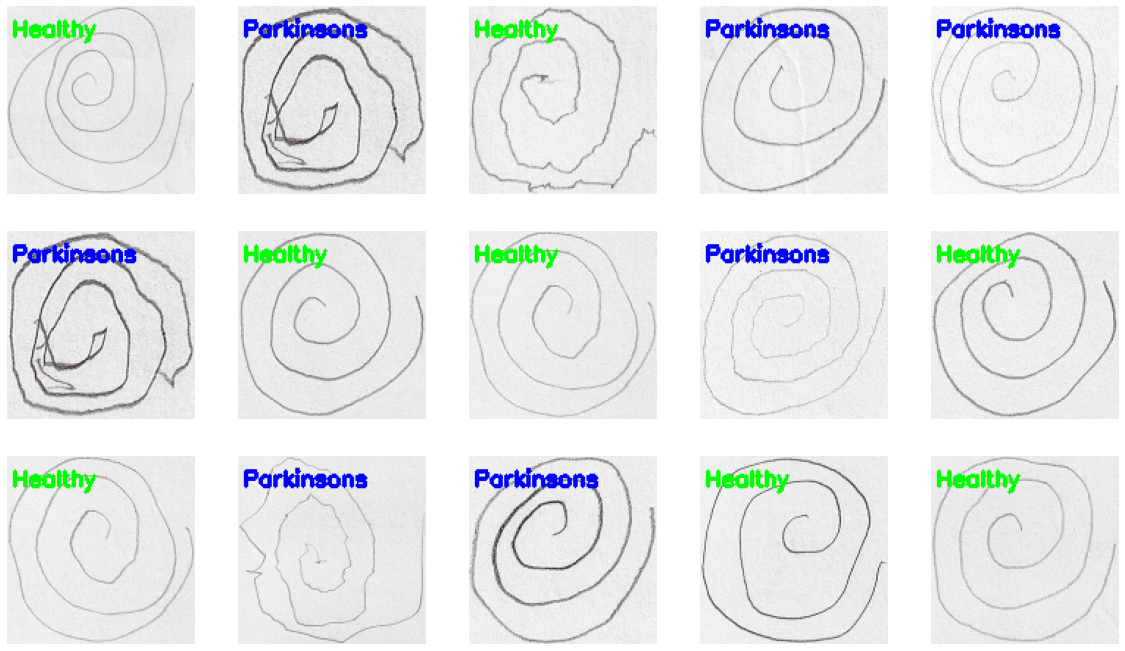

In [42]:
testingPath = os.path.sep.join(["/content/drive/MyDrive/archive (2)/spiral", "testing"])
test_prediction(spiralModels['Rf']['classifier'], testingPath)

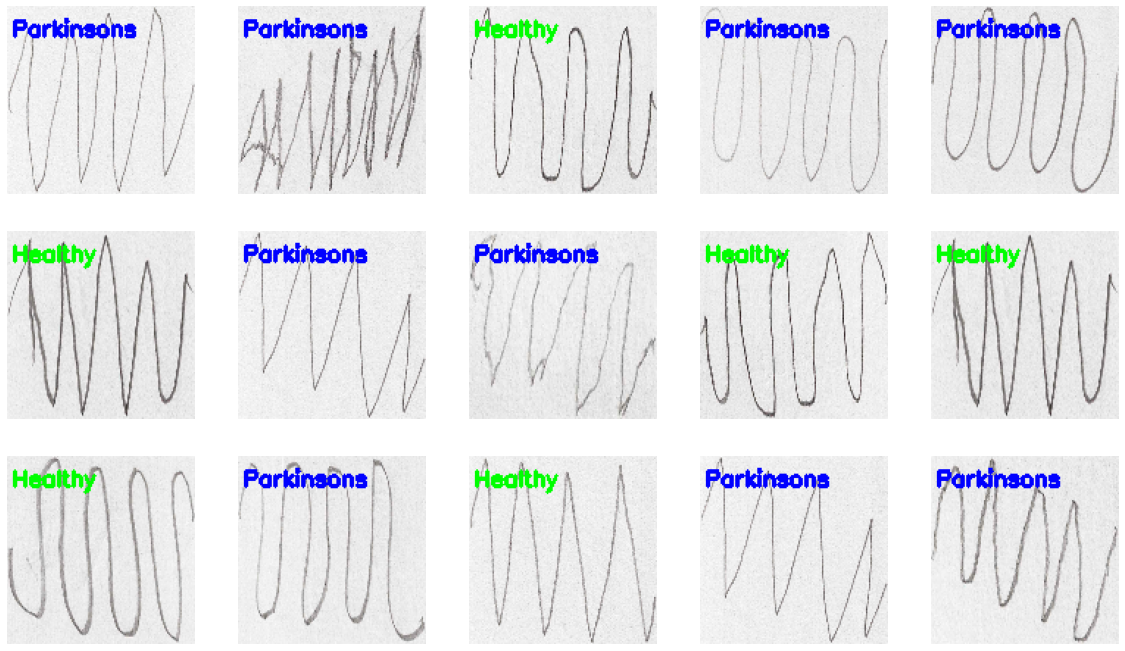

In [44]:
testingPath = os.path.sep.join(["/content/drive/MyDrive/archive (2)/wave", "testing"])
test_prediction(waveModels['Rf']['classifier'], testingPath)